### In this notebook we will preprocess the quering to get target faces using MTCNN so that they are ready to be fed into our pre-trained models.

### Queries can be downloaded here: https://drive.google.com/drive/folders/1dyKkAIwg3PmbcaU_iKkiPY2E-WXdm07J?usp=sharing, and must be put under the 'inputs' folder.

# Dataset Read

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from matplotlib import image

In [2]:
X = list()

for name in os.listdir('inputs'):
    path = 'inputs/' + name
    X.append(image.imread(path))

X = np.array(X)

In [3]:
X.shape

(10, 150, 150, 3)

# MTCNN Face Detection

In [4]:
from mtcnn.mtcnn import MTCNN
from PIL import Image
import time

def extract_face(detector, pixels, required_size=(250, 250)):
    # create the detector, using default weights
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    # deal with negative pixel index
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)
    return face_array

In [5]:
faces = list()

detector = MTCNN()
count = 0
for train in X:
    start = time.time()
    face = extract_face(detector, train)
    faces.append(face)
    end = time.time()
    print(f'Time Spent {end - start} Count{count}')
    count += 1
    

faces = np.array(faces)

Time Spent 3.3629064559936523 Count0
Time Spent 0.4017808437347412 Count1
Time Spent 0.3556797504425049 Count2
Time Spent 0.3140714168548584 Count3
Time Spent 0.3720831871032715 Count4
Time Spent 0.3940916061401367 Count5
Time Spent 0.36407995223999023 Count6
Time Spent 0.2940669059753418 Count7
Time Spent 0.36608266830444336 Count8
Time Spent 0.2740616798400879 Count9


## Output MTCNN

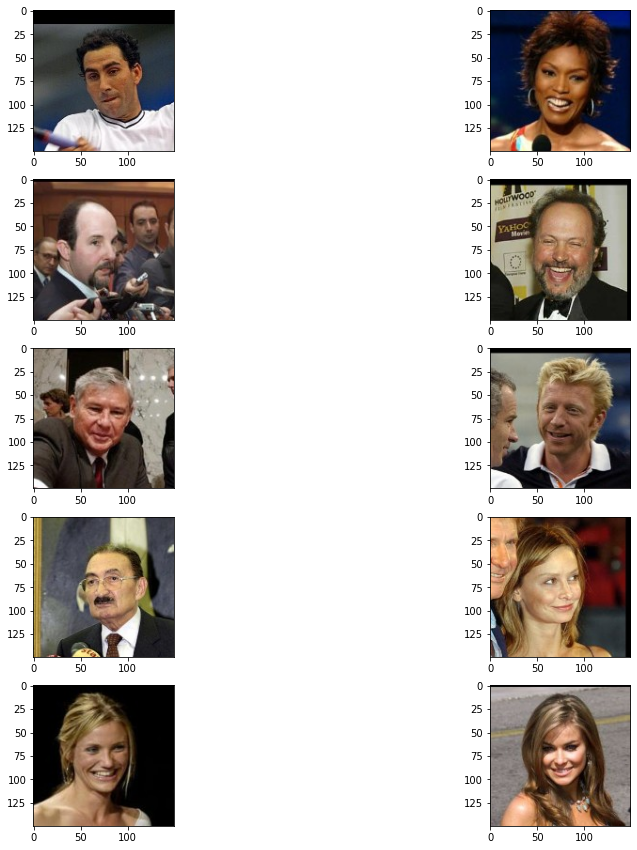

In [6]:
fig, axs = plt.subplots(5, 2, figsize=(15,15))

axis = axs.ravel()

for index, face in enumerate(X):
    axis[index].imshow(face)

# fig.savefig('mtcnn-input')

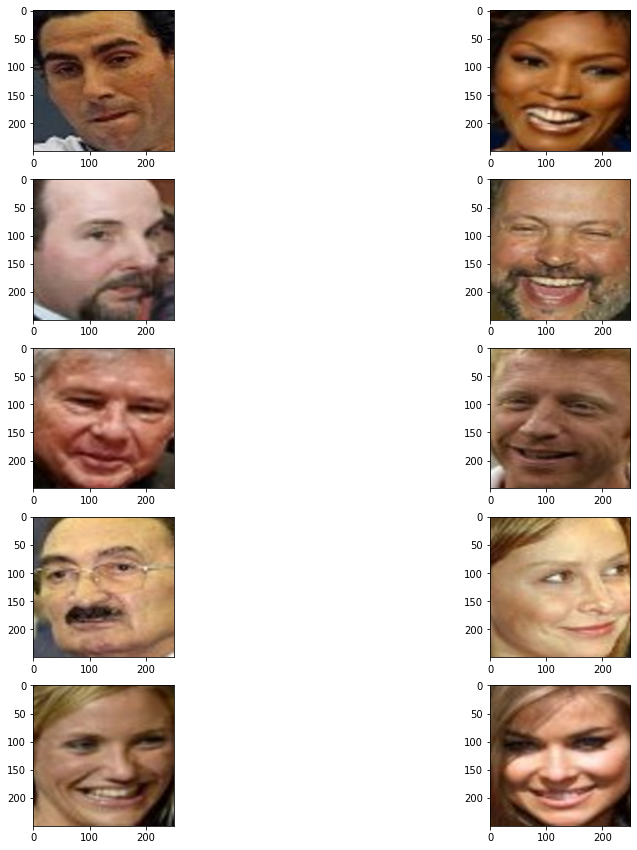

In [7]:
fig, axs = plt.subplots(5, 2, figsize=(15,15))

axis = axs.ravel()

for index, face in enumerate(faces):
    axis[index].imshow(face)

# fig.savefig('mtcnn-output')

### Above you can see the output of MTCNN model.

In [25]:
# np.save('query_images/query_images', faces) # these faces will be fed into our pretrained models